<a href="https://colab.research.google.com/github/csoren66/MNIST-Dataset-Digit-Recognizer/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Part-1. Preprocessing of data**

In [263]:
## import the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import to_categorical
## fetch the datasetes
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [264]:
## checking the dataset
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", x_test.shape)

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000, 28, 28)


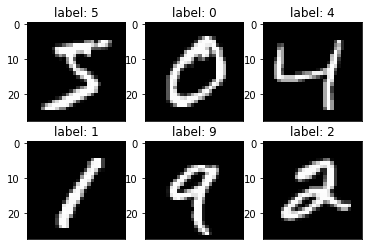

In [265]:
## let plot the image
fig =plt.figure()

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title(f"label: {y_train[i]}") ## the label
  plt.xticks([])
  fig.show()

In [266]:
#let explore the single sample
NUM = 3
print(f"label: {y_train[NUM]}")
print("shape: ", x_train[NUM].shape)
print("*"*50)
digit = x_train[NUM]
print(digit)


label: 1
shape:  (28, 28)
**************************************************
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0 

In [267]:
## prettify the matrix
for i in digit:
  print(*i, sep =" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 124 253 255 63 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 96 244 251 253 62 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 127 251 251 253 62 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 68 236 251 211 31 8 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 60 228 251 251 94 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 155 253 253 189 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 20 253 251 235 66 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 32 205 253 251 126 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 104 251 253 184 15 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 80 240 251 193 23 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 32 253 253 253 159 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0

#### **Preparing the input data**

In [268]:
## Reshape --> Flatten the matrix into one dimensional
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [269]:
## change the datatypes
x_train = x_train.astype('float')
x_test = x_test.astype('float')

#### **Normalize the data**

In [270]:
x_train /= 255
x_test /= 255

In [271]:
## checking the dataset after preprocess
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [272]:
print(max(x_train[0]),max(x_test[0]))

1.0 1.0


#### **Preprocess the labels**

In [273]:
y_train[2]

4

In [274]:
## Processing step
NUM_CLASSES = 10

y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

In [275]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

#### **Part-2. Creating a neural network model**

In [276]:
##import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [277]:
## create the instance

model = Sequential()

In [278]:
## add the first layer
model.add(Dense(256, input_shape=(784,)))

In [279]:
## adding the first layers
model.add(Activation('relu'))

In [280]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
Total params: 200,960
Trainable params: 200,960
Non-trainable params: 0
_________________________________________________________________


In [281]:
model.add(Dense(256, activation="relu"))

In [282]:
## add the output layer
model.add(Dense(NUM_CLASSES, activation="softmax")) ## NUM_CLASSES == 10

In [283]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [284]:
## compile the model now
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#### **Part-3. Training the network**

In [285]:
EPOCHS = 10
BATCH_SIZE = 128

In [286]:
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 1.3547 - accuracy: 0.6818 - val_loss: 0.6803 - val_accuracy: 0.8528
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.5598 - accuracy: 0.8616 - val_loss: 0.4316 - val_accuracy: 0.8875
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4210 - accuracy: 0.8855 - val_loss: 0.3597 - val_accuracy: 0.9019
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3665 - accuracy: 0.8966 - val_loss: 0.3245 - val_accuracy: 0.9093
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3346 - accuracy: 0.9039 - val_loss: 0.3009 - val_accuracy: 0.9150
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3126 - accuracy: 0.9097 - val_loss: 0.2850 - val_accuracy: 0.9194
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2948 - accuracy: 0.9149 - val_loss: 0.2726 - val_accuracy: 0.9231
Epoch 

In [287]:
BATCH_SIZE

128

In [288]:
  total_step = 60000 / BATCH_SIZE

In [289]:
validation_split = 0.2
training_split = 0.8

In [290]:
total_step * training_split

375.0

In [291]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [292]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [293]:
for i in history.history.keys():
  print(i, history.history[i])

loss [1.3546597957611084, 0.5598268508911133, 0.42104560136795044, 0.36645230650901794, 0.3346061706542969, 0.3125745356082916, 0.29476112127304077, 0.2805415093898773, 0.2679503560066223, 0.25691676139831543]
accuracy [0.6818333268165588, 0.8616041541099548, 0.8855208158493042, 0.8966249823570251, 0.9039375185966492, 0.9096666574478149, 0.9148541688919067, 0.9186041951179504, 0.9228958487510681, 0.9270208477973938]
val_loss [0.6802529096603394, 0.4316064417362213, 0.35966524481773376, 0.324532151222229, 0.3009105324745178, 0.2850469648838043, 0.27255779504776, 0.25959914922714233, 0.24859082698822021, 0.2400941550731659]
val_accuracy [0.8528333306312561, 0.887499988079071, 0.9019166827201843, 0.909333348274231, 0.9150000214576721, 0.9194166660308838, 0.9230833053588867, 0.9278333187103271, 0.9305833578109741, 0.9325833320617676]


#### Plotting the result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 'train' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Legend does not support 'train' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


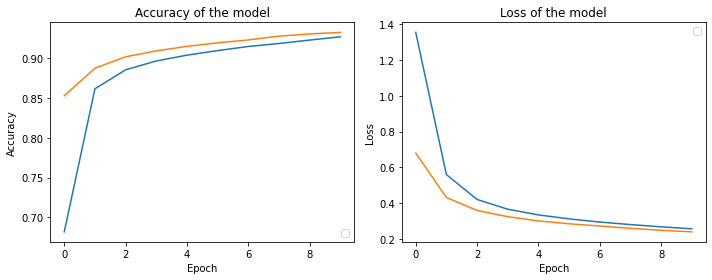

In [294]:
def plot_history(history):
  fig = plt.figure(figsize=(10, 4))
  ## accuracy plot
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy of the model')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['train'], ['test'], loc = 'lower right')

  ## loss plot
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss of the model')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['train'], ['test'], loc = 'upper right')

  plt.tight_layout()

  fig.show();

plot_history(history)


#### Save and loding of model

In [295]:
## lets create the folder to save the model
!mkdir -p models

In [296]:
## Lets save the whole model as hdf5 file
model.save("models/model_basic_v1.h5") 

In [297]:
## check saved model
!ls models

model_arch_v1.json  model_basic_v1.h5  model_best_v3.h5  model_weights_v1.h5


In [298]:
## load saved model
model_loaded = tf.keras.models.load_model("models/model_basic_v1.h5")

In [299]:
model_loaded.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [300]:
## lets serialized and save the model architecture and wieghts separately
## we will miss in next section
model_json = model.to_json()
with open("models/model_arch_v1.json", "w") as json_file:
  json_file.write(model_json)

## serialize and save weights to HDF5
model.save_weights("models/model_weights_v1.h5")

In [301]:
!ls models

model_arch_v1.json  model_basic_v1.h5  model_best_v3.h5  model_weights_v1.h5


#### Lets add some callbacks to make it do stuff for us


In [302]:
## Let load the model architecture so we train new model to scretch
with open('models/model_arch_v1.json', 'r') as json_file:
  model_v2_json = json_file.read()

model_v2 = tf.keras.models.model_from_json(model_v2_json)

In [303]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [324]:
## import callback from keras 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [305]:
## early stopping callback
earlystop = EarlyStopping(
    patience = 3,
    monitor = "val_loss" ,
    mode = 'min',
    verbose = 1
)


In [325]:
## model check pointing callback
checkpoint = ModelCheckpoint(
    filepath="models/model_best_v3.h5",
    monitor="val_loss",
    save_best_only=True,
    mode='min',
    verbose=1
    )

#### Lets add optimizer with a different learning rate as well

In [326]:
from tensorflow.keras.optimizers import SGD

In [327]:
optimizer = SGD(learning_rate=0.001)

In [328]:
## model compile
model_v2.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [338]:
## train the model with callbacks
history2 = model_v2.fit(
    x=x_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 1.7737 - accuracy: 0.6530 - val_loss: 1.6529 - val_accuracy: 0.7091
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 1.5569 - accuracy: 0.7147 - val_loss: 1.4334 - val_accuracy: 0.7554
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 1.3497 - accuracy: 0.7528 - val_loss: 1.2318 - val_accuracy: 0.7841
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 1.1677 - accuracy: 0.7764 - val_loss: 1.0616 - val_accuracy: 0.8074
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 1.0190 - accuracy: 0.7962 - val_loss: 0.9264 - val_accuracy: 0.8214
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.9026 - accuracy: 0.8102 - val_loss: 0.8222 - val_accuracy: 0.8332
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.8126 - accuracy: 0.8226 - val_loss: 0.7421 - val_accuracy: 0.8428
Epoch 

In [339]:
## lets first create a function to plot loss and accuracy

def plot_history(history):
  fig = plt.figure(figsize=(10, 4))
  ## accuracy plot
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy of Model 2')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'test'], loc='lower right')

  ## loss plot
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss of Model 2')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['train', 'test'], loc='upper right')

  plt.tight_layout()

  fig.show();

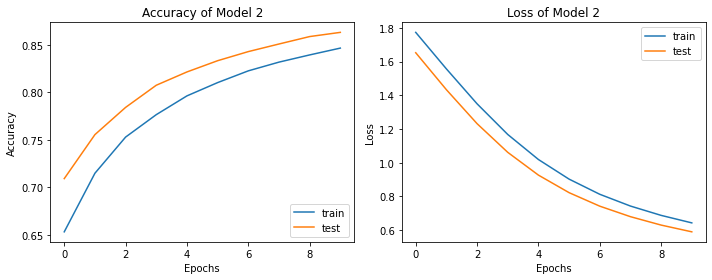

In [340]:
plot_history(history2)

####Testing and Evaluating the model

In [349]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

In [350]:
print(predictions)
print(predictions.round(2))

[[2.6816537e-03 3.8969709e-04 4.5815320e-03 7.7980128e-03 1.4414586e-02
  7.7913669e-03 7.4694294e-04 9.1886598e-01 6.5158596e-03 3.6214292e-02]
 [7.2145626e-02 9.7540766e-03 3.1560212e-01 1.8901549e-01 7.4100925e-04
  1.3062920e-01 2.2542602e-01 7.7185780e-04 5.4265153e-02 1.6494605e-03]
 [6.9199307e-03 8.0305105e-01 5.7751369e-02 2.3335833e-02 1.0971880e-02
  1.4121497e-02 1.7654656e-02 1.2984587e-02 4.0527415e-02 1.2681707e-02]
 [9.6544445e-01 1.4803325e-05 2.7293423e-03 1.7089010e-03 9.5967676e-05
  2.1846175e-02 5.3685540e-03 1.0464240e-03 9.3859411e-04 8.0675783e-04]
 [1.7368391e-02 1.5682497e-03 4.4854380e-02 7.4446867e-03 5.9061933e-01
  1.8189501e-02 3.9968539e-02 7.4279115e-02 3.6133587e-02 1.6957425e-01]
 [1.4919622e-03 9.0432870e-01 2.8495692e-02 1.4856562e-02 3.5862164e-03
  5.8309715e-03 3.1659359e-03 6.4063324e-03 2.5825404e-02 6.0122865e-03]]
[[0.   0.   0.   0.01 0.01 0.01 0.   0.92 0.01 0.04]
 [0.07 0.01 0.32 0.19 0.   0.13 0.23 0.   0.05 0.  ]
 [0.01 0.8  0.06 0.02 0

In [331]:
prediction_classes = np.argmax(predictions, axis=-1)
print(prediction_classes)

[4 3 1 0 2 1]


In [351]:
## now lets check the actual labels from y_test
print(y_test[:SAMPLES])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [333]:
## extract the labels classes from y_test
actual_classes = np.argmax(y_test[:SAMPLES], axis=-1)
print(actual_classes)

[7 2 1 0 4 1]


####Now lets do that with all the test images

In [334]:
score = model_v2.evaluate(x_test, y_test, return_dict=True)

313/313 [==============================] - 1s 3ms/step - loss: 1.8677 - accuracy: 0.6127


In [335]:
score

{'accuracy': 0.6126999855041504, 'loss': 1.8676632642745972}

####Visualize the predictions

In [336]:
def show_images(samples, predicted):
  fig = plt.figure(figsize=(6, 6))
  for i, image in enumerate(samples):
    plt.subplot(3, 3, i+1)
    image = image.reshape(28, 28) * 255
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.title(f"Predicted {predicted[i]}")
    plt.grid(False)
    plt.xticks([])

  plt.tight_layout()
  fig.show();

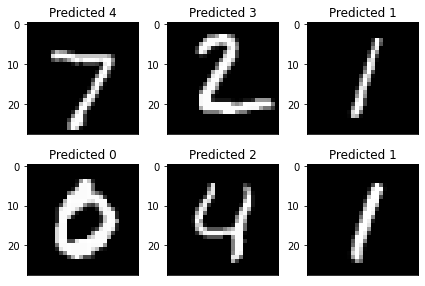

In [337]:
show_images(x_test[:SAMPLES], prediction_classes)